# *Project Goal  🏎️* 

### 1] Find Drivers likely too finish on Podium 
### 2] Accurately predict finishing position of each Driver

In [29]:
import pandas as pd

folder_path = '/kaggle/input/formula-1-world-championship-1950-2020'

# ID of constructors
constructors_df = pd.read_csv(folder_path + '/constructors.csv')

# ID of drivers
drivers_df = pd.read_csv(folder_path + '/drivers.csv')

# ID of each race
races = pd.read_csv(folder_path + '/races.csv')

# Starting grid and final position of every driver in every race (also includes status of each race)
results_df = pd.read_csv(folder_path + '/results.csv')

In [30]:
print(races)

      raceId  year  round  circuitId                    name        date  \
0          1  2009      1          1   Australian Grand Prix  2009-03-29   
1          2  2009      2          2    Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17      Chinese Grand Prix  2009-04-19   
3          4  2009      4          3      Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4      Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                     ...         ...   
1120    1140  2024     20         32  Mexico City Grand Prix  2024-10-27   
1121    1141  2024     21         18    São Paulo Grand Prix  2024-11-03   
1122    1142  2024     22         80    Las Vegas Grand Prix  2024-11-23   
1123    1143  2024     23         78        Qatar Grand Prix  2024-12-01   
1124    1144  2024     24         24    Abu Dhabi Grand Prix  2024-12-08   

          time                                                url    fp1_date  \
0     

In [31]:
print(results_df.columns)
race_df = races[["raceId", "year", "round", "circuitId"]].copy()

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


# Importing Libraries

In [32]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [33]:
print("Driver Dataframe ->\n\n", results_df.head())

print("\n\n Race Dataframe ->\n\n", race_df.head())

print("\n\n Drivers Dataframe ->\n\n", drivers_df.head())

Driver Dataframe ->

    resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         

## Sorting

Sorting Year after 1982, because before 1981, the cars in F1 were manufactured differently than today!

In [34]:
race_df = race_df.sort_values(by=['year','round'])
race_df = race_df[race_df['year'] >= 1982]

print(race_df)

      raceId  year  round  circuitId
466      467  1982      1         30
467      468  1982      2         36
468      469  1982      3         43
469      470  1982      4         21
470      471  1982      5         40
...      ...   ...    ...        ...
1120    1140  2024     20         32
1121    1141  2024     21         18
1122    1142  2024     22         80
1123    1143  2024     23         78
1124    1144  2024     24         24

[768 rows x 4 columns]


### Checking Duplicates

In [35]:
duplicates = race_df.duplicated()
num = duplicates.sum()
print(f"Number of Duplicate rows: {num}")
print("race_df - \n\n", race_df)

Number of Duplicate rows: 0
race_df - 

       raceId  year  round  circuitId
466      467  1982      1         30
467      468  1982      2         36
468      469  1982      3         43
469      470  1982      4         21
470      471  1982      5         40
...      ...   ...    ...        ...
1120    1140  2024     20         32
1121    1141  2024     21         18
1122    1142  2024     22         80
1123    1143  2024     23         78
1124    1144  2024     24         24

[768 rows x 4 columns]


Merging useful columns from Results_df with Race_df

In [36]:
res_df = results_df[['raceId','driverId','constructorId','grid','positionOrder']].copy()
df = pd.merge(race_df,res_df, on='raceId')
print(df)

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17995    1144  2024     24         24       825            210    14   
17996    1144  2024     24         24       859            215    12   
17997    1144  2024     24         24       822             15     9   
17998    1144  2024     24         24       861              3    20   
17999    1144  2024     24         24       815              9    10   

       positionOrder  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5

In [37]:
df.dtypes
df.isna().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,18000.0,501.968222,364.512288,1.0,213.75,372.5,905.0,1144.0
year,18000.0,2002.654889,12.722587,1982.0,1991.00,2002.0,2014.0,2024.0
round,18000.0,9.419556,5.313033,1.0,5.00,9.0,14.0,24.0
circuitId,18000.0,20.286000,18.489822,1.0,8.00,14.0,26.0,80.0
driverId,18000.0,245.154333,321.428437,1.0,24.00,96.0,183.0,862.0
constructorId,18000.0,37.825444,58.067085,1.0,6.00,17.0,34.0,215.0
grid,18000.0,11.228500,7.003476,0.0,5.00,11.0,17.0,29.0
positionOrder,18000.0,12.631889,7.557388,1.0,6.00,12.0,18.0,39.0


# Visualizing...

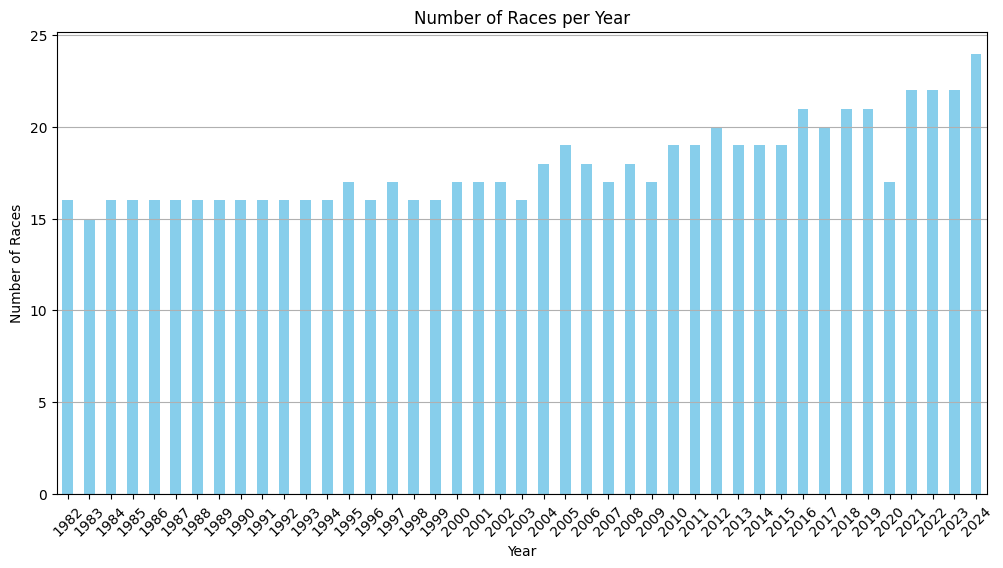

In [38]:
races_per_year = df.groupby('year')['raceId'].nunique()

plt.figure(figsize=(12,6))
races_per_year.plot(kind='bar', color='skyblue')

plt.title("Number of Races per Year")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

## Calculating number of races wrt. Team and Drivers

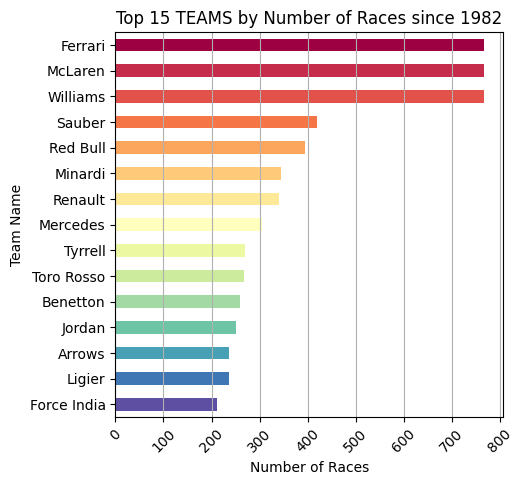

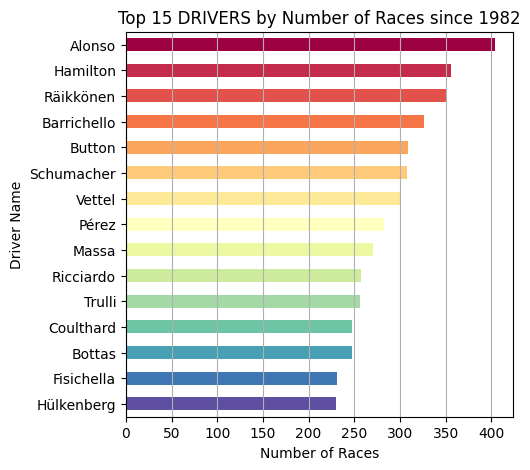

In [39]:
# 1] Create a dictionary using Pandas series with constructor names and ID from constructor table
# 2] Group the main df with constructor ID
# 3] Map the grouped table with the dictionary to add the values respectively! 

constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()
driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

races_per_team = df.groupby('constructorId')['raceId'].nunique()
races_per_driver = df.groupby('driverId')['raceId'].nunique()

races_per_team.index = races_per_team.index.map(constructor_name_dict)
races_per_team_sorted = races_per_team.sort_values(ascending=False).head(15)

races_per_driver.index = races_per_driver.index.map(driver_name_dict)
races_per_driver_sorted = races_per_driver.sort_values(ascending=False).head(15)


# Team
plt.figure(figsize=(5,5))
colors = plt.cm.Spectral(np.linspace(0,1,len(races_per_team_sorted)))
races_per_team_sorted.plot(kind="barh", color=colors)

plt.title('Top 15 TEAMS by Number of Races since 1982')
plt.ylabel('Team Name')
plt.xlabel('Number of Races')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()


# Driver
plt.figure(figsize=(5, 5))  
colors = plt.cm.Spectral(np.linspace(0, 1, len(races_per_driver_sorted)))
races_per_driver_sorted.plot(kind='barh', color=colors)

plt.title('Top 15 DRIVERS by Number of Races since 1982')
plt.ylabel('Driver Name')
plt.xlabel('Number of Races')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

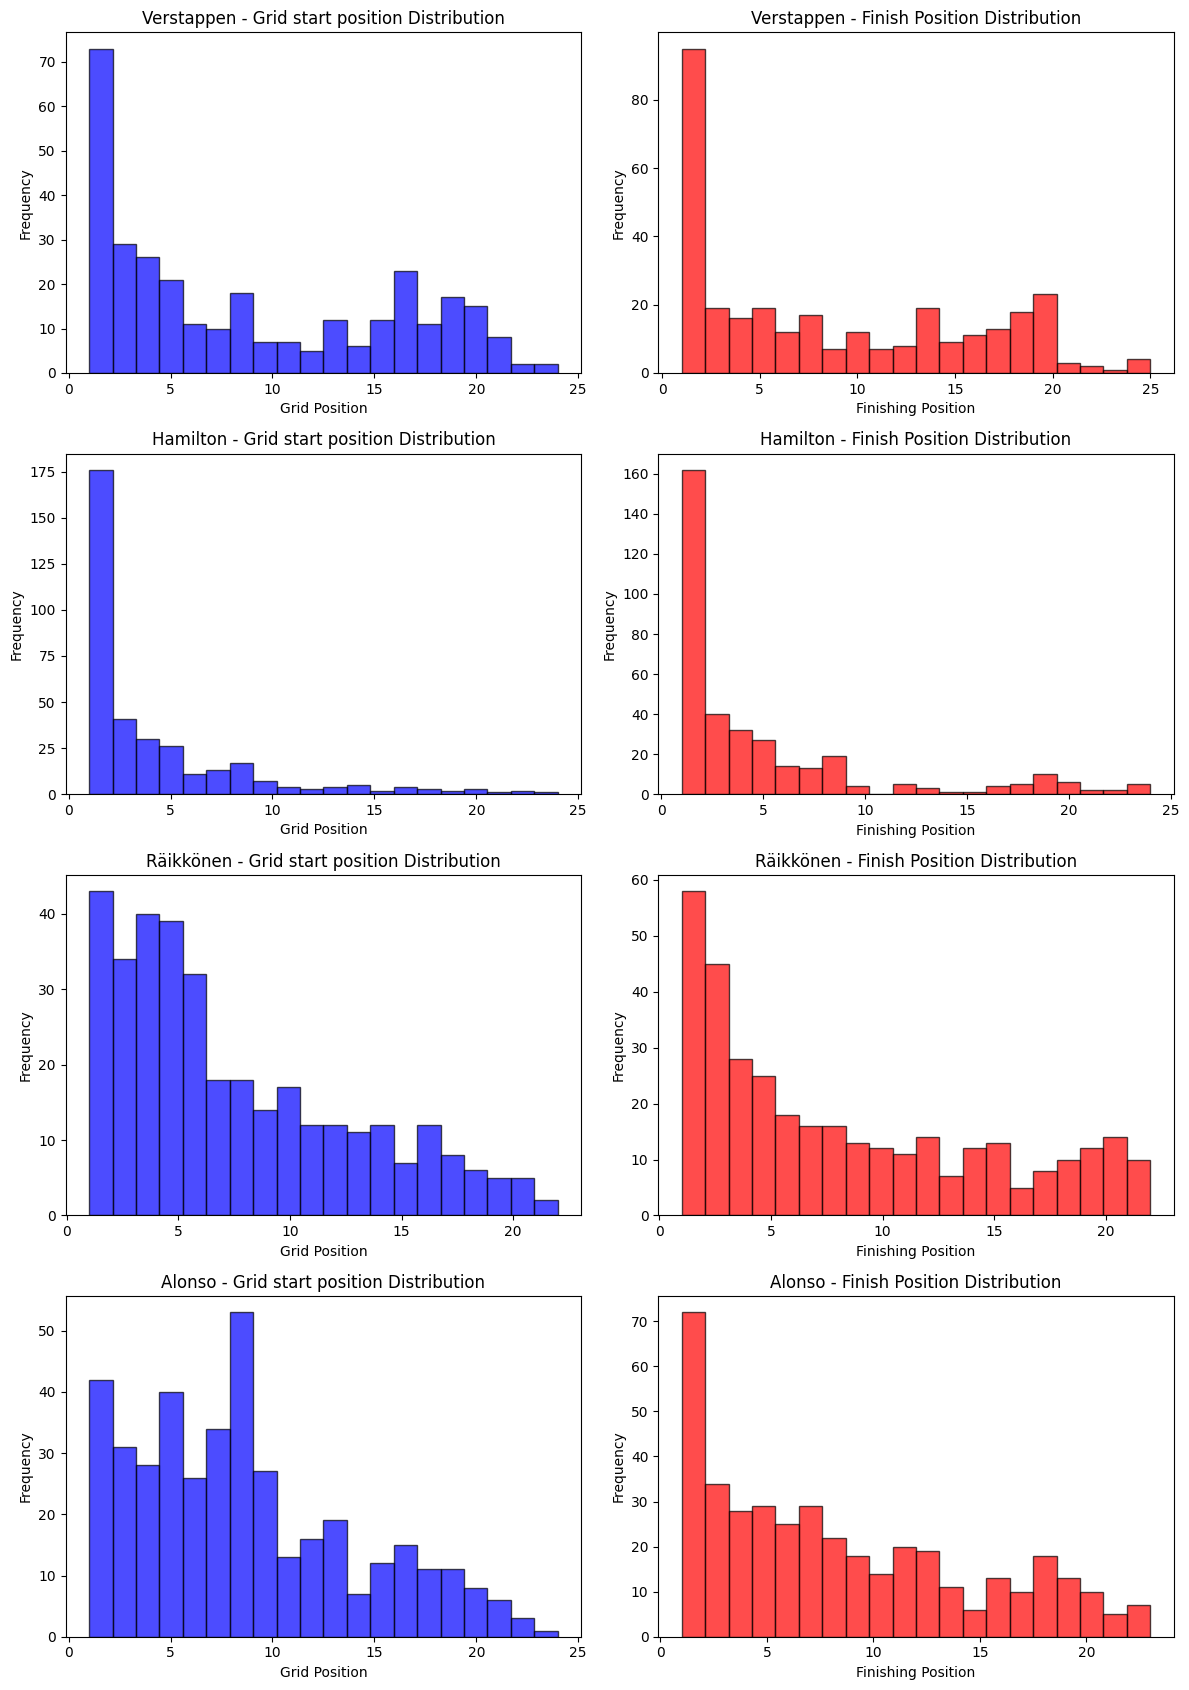

In [40]:
# Histogram for Alonso, Hamilton and Raikkonen
# 1] Create a target names
# 2] Create a new table by extracting values from the drivers table
# 3] Merge the new table with main df

target = ['Verstappen', 'Hamilton', 'Räikkönen', 'Alonso']
driver_info = drivers_df[drivers_df['surname'].isin(target) & ~(drivers_df['driverId']==708)][['driverId', 'forename','surname']]
df_drivers = df.merge(driver_info, on='driverId')
df_drivers = df_drivers[df_drivers['grid']!=0]

fig,axes = plt.subplots(4,2,figsize=(12,17))

for idx, driver in enumerate(target):
    df_driver = df_drivers[df_drivers['surname'] == driver]

    axes[idx,0].hist(df_driver['grid'], bins=20,alpha=0.7,color='blue', edgecolor='black')
    axes[idx,0].set_title(f'{driver} - Grid start position Distribution')
    axes[idx,0].set_xlabel('Grid Position')
    axes[idx,0].set_ylabel('Frequency')

    axes[idx, 1].hist(df_driver['positionOrder'], bins=20, alpha=0.7, color='red', edgecolor='black')
    axes[idx, 1].set_title(f'{driver} - Finish Position Distribution')
    axes[idx, 1].set_xlabel('Finishing Position')
    axes[idx, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


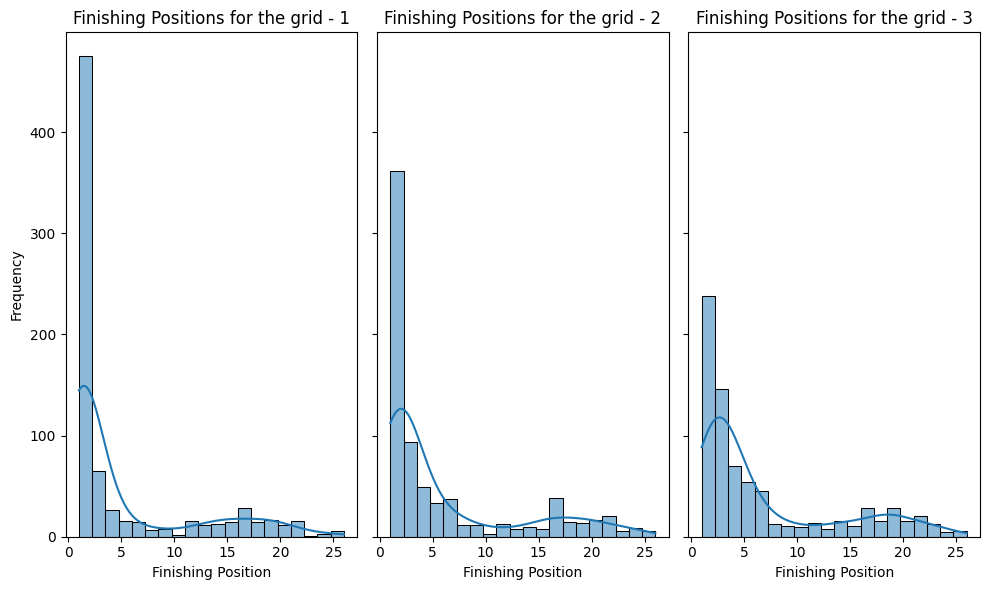

In [41]:
# Group drivers starting at grid positions 1, 2 and 3 and visualize frequency of finishing at different positins.

target = [1,2,3]
df_podium = df[df['grid'].le(3).astype(int) & (df['grid']!=0)]

fig,axes = plt.subplots(1,3, figsize=(10,6), sharey=True)

for i,grid_pos in enumerate(target):
    sns.histplot(
        data = df_podium[df_podium["grid"] == grid_pos],
        x='positionOrder', bins=20, kde=True, ax=axes[i]
    )
    axes[i].set_title(f"Finishing Positions for the grid - {grid_pos}")
    axes[i].set_xlabel("Finishing Position")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()    

# TO DO - 

1] Find the times a driver(Alonso) has started from a position, let's say 5th, visualize the positions he ended up on.


# Feature Engineering!

## Percentage of Finishing in Top 3

In [42]:
df['Top 3 Finishes'] = df['positionOrder'].le(3).astype(int)
print(df)

num = df['raceId'].nunique()
print(f"Number of unique drivers = {num}")

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17995    1144  2024     24         24       825            210    14   
17996    1144  2024     24         24       859            215    12   
17997    1144  2024     24         24       822             15     9   
17998    1144  2024     24         24       861              3    20   
17999    1144  2024     24         24       815              9    10   

       positionOrder  Top 3 Finishes  
0                  1               1  
1                  2               1  
2                 

## Driver POV - Top 3 Last Year

In [43]:
# Use Aggregate to get unique and sum of selected columns
# These new columns are created to calculate the percentages.

driver_yearly_stats = df.groupby(['year','driverId']).agg(
    Total_Races=('raceId','nunique'),
    Top_3_Finishes = ('Top 3 Finishes', 'sum')
).reset_index()

print(f"Driver's Yearly stats - \n\n {driver_yearly_stats}")

# Calculate percentage of top 3 Finishes each Year
driver_yearly_stats['Driver Top 3 Finish Percentage (This Year)'] = (driver_yearly_stats['Top_3_Finishes'] / driver_yearly_stats['Total_Races']) * 100

driver_last_year_stats = driver_yearly_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Top 3 Finish Percentage (This Year)': 'Driver Top 3 Finish Percentage (Last Year)'})

df = pd.merge(df, driver_last_year_stats[['year', 'driverId', 'Driver Top 3 Finish Percentage (Last Year)']], on=['year', 'driverId'], how='left')

print(df[df["year"]>=1983])

Driver's Yearly stats - 

       year  driverId  Total_Races  Top_3_Finishes
0     1982        90            1               0
1     1982        95           13               1
2     1982       105           16               2
3     1982       110           16               1
4     1982       117           16               4
...    ...       ...          ...             ...
1219  2024       858           14               0
1220  2024       859            6               0
1221  2024       860            3               0
1222  2024       861            9               0
1223  2024       862            1               0

[1224 rows x 4 columns]
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983      1         36       172              3    18   
468       452  1983      1         36       175             

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Constructor POV - Top 3 Last Year

In [44]:
constructor_last_year_stats = df.groupby(['year','constructorId','round']).agg(
    Sum_Top_3_Finishes_Last_Year = ('Driver Top 3 Finish Percentage (Last Year)', 'sum')
).reset_index()

print(f"Constructor annual Stats:\n\n {constructor_last_year_stats}")

constructor_last_year_stats['Constructor Top 3 Finish Percentage (Last Year)'] = constructor_last_year_stats['Sum_Top_3_Finishes_Last_Year']/2

df = pd.merge(df, constructor_last_year_stats[['year', 'constructorId', 'round', 'Constructor Top 3 Finish Percentage (Last Year)']], on=['year', 'constructorId', 'round'], how='left')

print("New dataframe")
print(df[df["year"]>=1983])

Constructor annual Stats:

       year  constructorId  round  Sum_Top_3_Finishes_Last_Year
0     1982              1      1                           0.0
1     1982              1      2                           0.0
2     1982              1      3                           0.0
3     1982              1      5                           0.0
4     1982              1      6                           0.0
...    ...            ...    ...                           ...
9218  2024            215     20                           0.0
9219  2024            215     21                           0.0
9220  2024            215     22                           0.0
9221  2024            215     23                           0.0
9222  2024            215     24                           0.0

[9223 rows x 4 columns]
New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1       

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Driver - Top 3 for CURRENT YEAR

In [45]:
def calculate_driver_top_3_percentage_before_round(row, df):
    # Filter for races in the same year, for the same driver, but in earlier rounds
    previous_races = df[(df['year'] == row['year']) & (df['driverId'] == row['driverId']) & (df['round'] < row['round'])]
    if len(previous_races) == 0:
      return pd.NA

    total_races = previous_races['raceId'].nunique()
    top_3_finishes = previous_races['Top 3 Finishes'].sum()

    # Calculate the percentage
    return (top_3_finishes / total_races) * 100 if total_races > 0 else pd.NA


df['Driver Top 3 Finish Percentage (This Year till last race)'] = df.apply(lambda row: calculate_driver_top_3_percentage_before_round(row, df), axis=1)

## Constructor - Top 3 for CURRENT YEAR

In [46]:
constructor_this_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    Sum_Top_3_Finishes_This_Year=('Driver Top 3 Finish Percentage (This Year till last race)', 'sum')
).reset_index()

constructor_this_year_stats['Constructor Top 3 Finish Percentage (This Year till last race)'] = constructor_this_year_stats["Sum_Top_3_Finishes_This_Year"]/2
df = pd.merge(df, constructor_this_year_stats[['year', 'constructorId', 'round', 'Constructor Top 3 Finish Percentage (This Year till last race)']], on=['year', 'constructorId', 'round'], how='left')

print("New dataframe")
print(df[df["year"]>=1983])

New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983      1         36       172              3    18   
468       452  1983      1         36       175              6     3   
469       452  1983      1         36       176             21    20   
...       ...   ...    ...        ...       ...            ...   ...   
17995    1144  2024     24         24       825            210    14   
17996    1144  2024     24         24       859            215    12   
17997    1144  2024     24         24       822             15     9   
17998    1144  2024     24         24       861              3    20   
17999    1144  2024     24         24       815              9    10   

       positionOrder  Top 3 Finishes  \
465                1               1   
466                2               1   
4

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Average

In [47]:
# Calculating the total number of races and top 3 finishes for each driver in each year
driver_yearly_stats = df.groupby(['year', 'driverId']).agg(
    Total_Races=('raceId', 'nunique'),
    Avg_position=('positionOrder', 'mean')
).reset_index()

print("Driver annual stats")
print(driver_yearly_stats)

# Calculating the percentage of top 3 finishes for each driver in each year
driver_yearly_stats['Driver Avg position (This Year)'] = driver_yearly_stats['Avg_position']

# Shifting the driver percentages to the next year for last year's data
driver_last_year_stats = driver_yearly_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Avg position (This Year)': 'Driver Avg position (Last Year)'})

df = pd.merge(df, driver_last_year_stats[['year', 'driverId', 'Driver Avg position (Last Year)']], on=['year', 'driverId'], how='left')

# Checking the merged data
print("New dataframe")
print(df[df["year"]>=1983])

# Calculating mean of top 3 finishes percentages for the two drivers in each constructor last year
constructor_last_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    sum_position_last_year=('Driver Avg position (Last Year)', 'sum')
).reset_index()

print("Constructor annual stats")
print(constructor_last_year_stats)

# Calculating the percentage of top 3 finishes for each constructor last year
constructor_last_year_stats['Constructor Avg position (Last Year)'] = constructor_last_year_stats["sum_position_last_year"]/2

df = pd.merge(df, constructor_last_year_stats[['year', 'constructorId', 'round', 'Constructor Avg position (Last Year)']], on=['year', 'constructorId', 'round'], how='left')

# Checking the merged data
print("New dataframe")
print(df[df["year"]>=1983])

def calculate_driver_avg_position_before_round(row, df):
    # Filter for races in the same year, for the same driver, but in earlier rounds
    previous_races = df[(df['year'] == row['year']) & (df['driverId'] == row['driverId']) & (df['round'] < row['round'])]
    if len(previous_races) == 0:
      return pd.NA
    # Calculate the total races and sum of positions
    total_races = previous_races['raceId'].nunique()
    positionSum = previous_races['positionOrder'].sum()

    # Calculate average position
    return (positionSum / total_races) if total_races > 0 else pd.NA

# Apply the function to each row in the DataFrame
df['Driver Average Position (This Year till last race)'] = df.apply(lambda row: calculate_driver_avg_position_before_round(row, df), axis=1)


# Calculating mean of top 3 finishes percentages for the two drivers in each constructor this year
constructor_this_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    sum_Position_Constructor = ('Driver Average Position (This Year till last race)', 'sum')
).reset_index()

print("Constructor annual stats")
print(constructor_this_year_stats)

# Calculating the percentage of top 3 finishes for each constructor this year
constructor_this_year_stats['Constructor Average Position (This Year till last race)'] = constructor_this_year_stats["sum_Position_Constructor"]/2

df = pd.merge(df, constructor_this_year_stats[['year', 'constructorId', 'round', 'Constructor Average Position (This Year till last race)']], on=['year', 'constructorId', 'round'], how='left')

# Checking the merged data
print("New dataframe")
print(df[df["year"]>=1983])

Driver annual stats
      year  driverId  Total_Races  Avg_position
0     1982        90            1     30.000000
1     1982        95           13     13.692308
2     1982       105           16      9.000000
3     1982       110           16     14.437500
4     1982       117           16     10.000000
...    ...       ...          ...           ...
1219  2024       858           14     17.142857
1220  2024       859            6     13.500000
1221  2024       860            3      9.666667
1222  2024       861            9     13.555556
1223  2024       862            1     15.000000

[1224 rows x 4 columns]
New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983      1         36       172              3    18   
468       452  1983      1         36       175              6     3   
469  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Constructor annual stats
      year  constructorId  round sum_Position_Constructor
0     1982              1      1                        0
1     1982              1      2                     10.0
2     1982              1      3                     14.5
3     1982              1      5                     12.0
4     1982              1      6                    11.75
...    ...            ...    ...                      ...
9218  2024            215     20                22.421053
9219  2024            215     21                    26.25
9220  2024            215     22                24.761905
9221  2024            215     23                25.727273
9222  2024            215     24                26.017391

[9223 rows x 4 columns]
New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983     

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


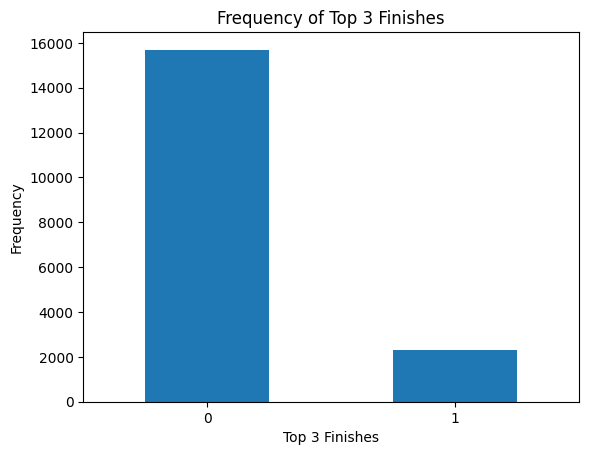

In [48]:
# Histogram for Top 3 Finishes
df['Top 3 Finishes'].value_counts().plot(kind='bar')
plt.title('Frequency of Top 3 Finishes')
plt.xlabel('Top 3 Finishes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [49]:
nan_counts = df.isna().sum()
print(nan_counts)

raceId                                                               0
year                                                                 0
round                                                                0
circuitId                                                            0
driverId                                                             0
constructorId                                                        0
grid                                                                 0
positionOrder                                                        0
Top 3 Finishes                                                       0
Driver Top 3 Finish Percentage (Last Year)                        3716
Constructor Top 3 Finish Percentage (Last Year)                      0
Driver Top 3 Finish Percentage (This Year till last race)         1224
Constructor Top 3 Finish Percentage (This Year till last race)       0
Driver Avg position (Last Year)                                   3716
Constr

# Feature Selection

In [50]:
# Drop result related columns
df_final = df.drop(labels=['raceId'], axis=1)

initial_count = len(df_final[df_final['year'] != 1982])
df_final = df_final.dropna()
final_count = len(df_final[df_final['year'] != 1982])

rows_dropped = initial_count - final_count
print(f"Number of rows dropped - {rows_dropped}")
df_final_keepPositionOrder = df_final.copy()
df_final = df_final.drop(['positionOrder'], axis=1)
print(df_final)

Number of rows dropped - 4137
       year  round  circuitId  driverId  constructorId  grid  Top 3 Finishes  \
493    1983      2         43       187              1    22               1   
494    1983      2         43       182              1    23               1   
495    1983      2         43       163              6     2               1   
496    1983      2         43       172              3     4               0   
497    1983      2         43       176             21    16               0   
...     ...    ...        ...       ...            ...   ...             ...   
17993  2024     24         24       840            117    13               0   
17995  2024     24         24       825            210    14               0   
17996  2024     24         24       859            215    12               0   
17997  2024     24         24       822             15     9               0   
17999  2024     24         24       815              9    10               0   

       Dr

# EDA

In [51]:
df_final["Driver Top 3 Finish Percentage (This Year till last race)"] = df_final["Driver Top 3 Finish Percentage (This Year till last race)"].astype(float)
df_final["Constructor Top 3 Finish Percentage (This Year till last race)"] = df_final["Constructor Top 3 Finish Percentage (This Year till last race)"].astype(float)
df_final["Driver Average Position (This Year till last race)"] = df_final["Driver Average Position (This Year till last race)"].astype(float)
df_final["Constructor Average Position (This Year till last race)"] = df_final["Constructor Average Position (This Year till last race)"].astype(float)

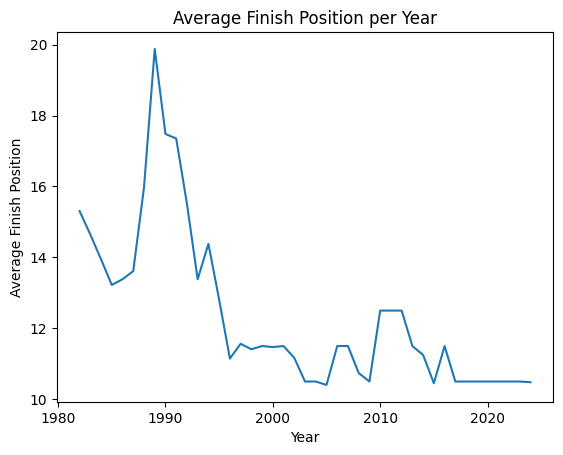

In [52]:
# Average finish position per year
avg_finish_per_year = df.groupby('year')['positionOrder'].mean()
avg_finish_per_year.plot(kind='line')
plt.title('Average Finish Position per Year')
plt.xlabel('Year')
plt.ylabel('Average Finish Position')
plt.show()


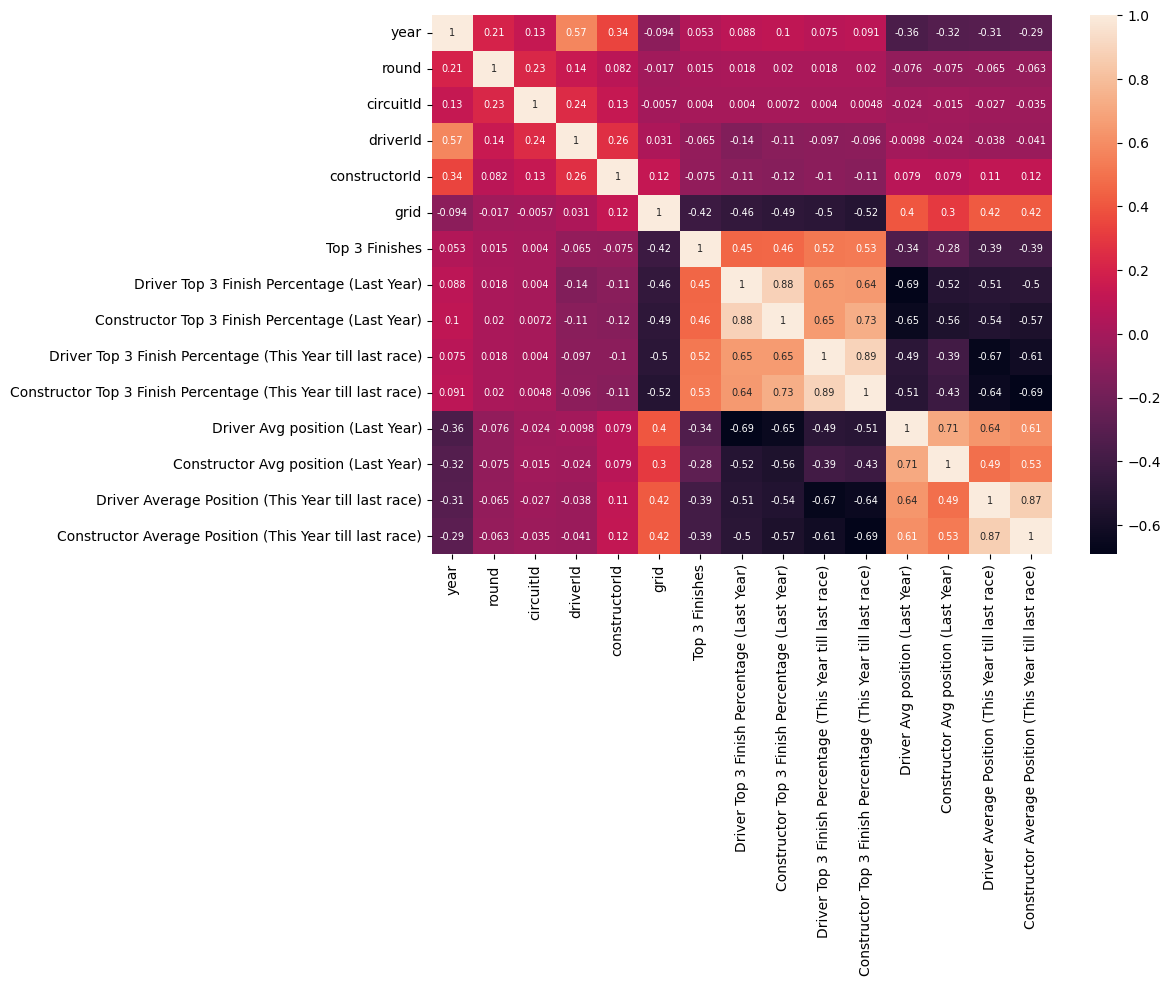

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(df_final.corr(), annot=True, mask = False, annot_kws={"size": 7})
plt.show()

We can see that the top 3 finish percentage for both drivers and constructors(teams) in the current and past year have strong positive correlations with the target variable `Top 3 Finish', which is whether the driver finishes in top 3 for this race. The values of these correlations are between 0.46 and 0.53.

In addition, grid (driver's starting position for this race) and average finishing positions for drivers and teams in the past and current year have negative correlations with the target variable `Top 3 Finish'. This is expected as when the starting position or average finishing position has a higher value, it's less likely for the car to finish in top 3.

Furthermore, several engineered features have some degree of correlations. For example, the correlation between 'Driver Top 3 Finish Percentage (Last Year)' and `Driver Top 3 Finish Percentage (This Year till last race)' is 0.65. But since they are not close to a perfect correlation, having an additional feature still has the potential to improve our classification model.

In [54]:
correlations = df_final.corr()['Top 3 Finishes'].sort_values(ascending=False)

# Display
print(correlations)

Top 3 Finishes                                                    1.000000
Constructor Top 3 Finish Percentage (This Year till last race)    0.530004
Driver Top 3 Finish Percentage (This Year till last race)         0.523083
Constructor Top 3 Finish Percentage (Last Year)                   0.460932
Driver Top 3 Finish Percentage (Last Year)                        0.454680
year                                                              0.052657
round                                                             0.014867
circuitId                                                         0.003999
driverId                                                         -0.064832
constructorId                                                    -0.075183
Constructor Avg position (Last Year)                             -0.275543
Driver Avg position (Last Year)                                  -0.339698
Driver Average Position (This Year till last race)               -0.387943
Constructor Average Posit

## One Hot Encoding

In [55]:
df_final_encoded = pd.get_dummies(df_final, columns=['circuitId', 'driverId', 'constructorId'])

# Create a list of columns excluding the one to move
cols = [col for col in df_final_encoded.columns if col != 'Top 3 Finishes']

# Append the column to the end of the DataFrame
df_final_encoded = df_final_encoded[cols + ['Top 3 Finishes']]

print(df_final_encoded)
print(df_final_encoded.shape)

       year  round  grid  Driver Top 3 Finish Percentage (Last Year)  \
493    1983      2    22                                   33.333333   
494    1983      2    23                                   21.428571   
495    1983      2     2                                   25.000000   
496    1983      2     4                                    6.666667   
497    1983      2    16                                    0.000000   
...     ...    ...   ...                                         ...   
17993  2024     24    13                                    0.000000   
17995  2024     24    14                                    0.000000   
17996  2024     24    12                                    0.000000   
17997  2024     24     9                                    0.000000   
17999  2024     24    10                                   40.909091   

       Constructor Top 3 Finish Percentage (Last Year)  \
493                                          27.380952   
494                

# Prediction

Trianing data: year 1983 - 2008

Validation data: year 2009 - 2016

Test data: year 2017 - 2023

In [56]:
df_1 = df_final_encoded.drop(["grid", "Driver Top 3 Finish Percentage (This Year till last race)", "Constructor Top 3 Finish Percentage (This Year till last race)", "Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)", "Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)"], axis = 1)


In [58]:
from sklearn.preprocessing import StandardScaler

train_df = df_1[(df_1["year"] >= 1983) & (df_1["year"] <= 2008)]
val_df = df_1[(df_1["year"] >= 2009) & (df_1["year"] <= 2016)]
test_df = df_1[(df_1["year"] >= 2017) & (df_1["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finishes'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finishes'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finishes'].values

In [59]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, ConfusionMatrixDisplay  # Import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Dictionary to store the best model and test accuracy for each algorithm
model_accuracy_info = {}

# Define the hyperparameter grid for each model
param_grid = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 10, 12, 13, 15, 20]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto'], 'random_state': [42], 'probability': [True]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'random_state': [42]},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 20], 'random_state': [42]},
    'GaussianNB': {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
}

# Ignore convergence and future warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)


## Hyperparameter Tuning

### 1] Experiment with lesser Features

Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 0.001, 'random_state': 42}
Test AUC-ROC for LogisticRegression: 0.8550

Model: KNeighborsClassifier
Best parameters for KNeighborsClassifier: {'n_neighbors': 20}
Test AUC-ROC for KNeighborsClassifier: 0.8250

Model: SVC
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test AUC-ROC for SVC: 0.5802

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.8470

Model: DecisionTreeClassifier
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'random_state': 42}
Test AUC-ROC for DecisionTreeClassifier: 0.6160

Model: GaussianNB
Best parameters for GaussianNB: {'var_smoothing': 0.1}
Test AUC-ROC for GaussianNB: 0.8797

Model: LogisticRegression, File: LogisticRegression_model_V1.joblib, Test AUC-ROC: 0.8550, Test Accuracy: 0.8375
Mode

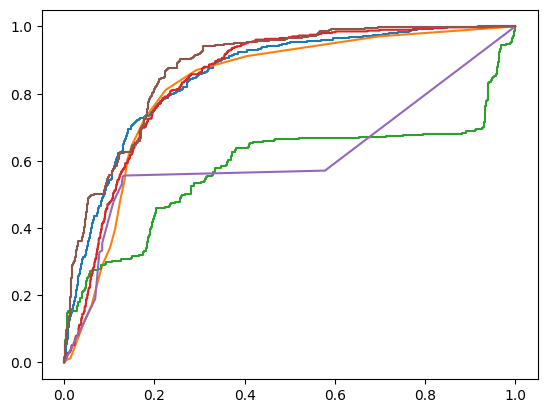

In [60]:
# Function to manually tune hyperparameters
def tune_hyperparameters(model, params, X_train, y_train, X_val, y_val):
    best_model = None
    best_params = {}
    best_auc = 0  # Use AUC-ROC instead of F1 score
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train, y_train)
        probabilities = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, probabilities[:, 1])  # Calculate AUC-ROC
        if auc > best_auc:
            best_auc = auc
            best_model = model
            best_params = param
    return best_model, best_params

# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Predict and evaluate on test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calculate AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_test[:, 1] >= 0.5)  # Calculate accuracy

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}\n")
    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Store AUC-ROC
        'accuracy': accuracy_test
    }

    # Calculate ROC curve and AUC for each model
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    # Print model and F1 score info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test AUC-ROC: {info['auc_roc']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

### 2] Experiment with Adding more Relevant Features

In [62]:
df_2 = df_final_encoded.drop(["grid", "Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)", "Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)"], axis = 1)

In [64]:
from sklearn.preprocessing import StandardScaler

train_df = df_2[(df_2["year"] >= 1983) & (df_2["year"] <= 2008)]
val_df = df_2[(df_2["year"] >= 2009) & (df_2["year"] <= 2016)]
test_df = df_2[(df_2["year"] >= 2017) & (df_2["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finishes'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finishes'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finishes'].values

Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 0.01, 'random_state': 42}
Test AUC-ROC for LogisticRegression: 0.9037

Model: KNeighborsClassifier
Best parameters for KNeighborsClassifier: {'n_neighbors': 20}
Test AUC-ROC for KNeighborsClassifier: 0.8799

Model: SVC
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test AUC-ROC for SVC: 0.7159

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.8776

Model: DecisionTreeClassifier
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'random_state': 42}
Test AUC-ROC for DecisionTreeClassifier: 0.5187

Model: GaussianNB
Best parameters for GaussianNB: {'var_smoothing': 0.1}
Test AUC-ROC for GaussianNB: 0.9040

Model: LogisticRegression, File: LogisticRegression_model_V2.joblib, Test AUC-ROC: 0.9037, Test Accuracy: 0.8637
Mo

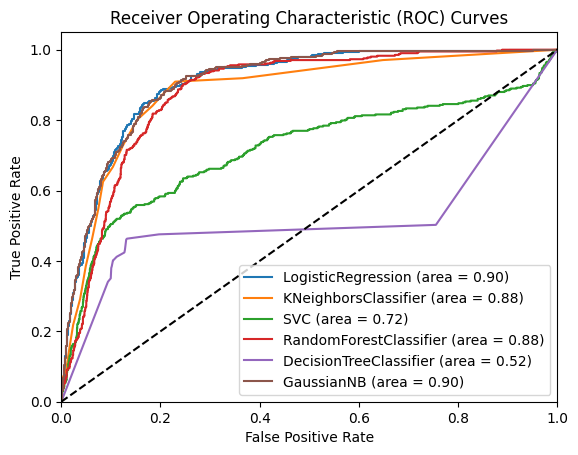

In [65]:
# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Predict and evaluate on test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calculate AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_test[:, 1] >= 0.5)  # Calculate accuracy

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}\n")
    model_filename = f"{name}_model_V2.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Store AUC-ROC
        'accuracy': accuracy_test
    }

    # Calculate ROC curve and AUC for each model
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    # Print model and F1 score info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test AUC-ROC: {info['auc_roc']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

### 3] Experiment by adding average finish positions of Drivers and Team

In [66]:
df_3 = df_final_encoded.drop(["grid"], axis = 1)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [67]:
from sklearn.preprocessing import StandardScaler

train_df = df_3[(df_3["year"] >= 1983) & (df_3["year"] <= 2008)]
val_df = df_3[(df_3["year"] >= 2009) & (df_3["year"] <= 2016)]
test_df = df_3[(df_3["year"] >= 2017) & (df_3["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finishes'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finishes'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finishes'].values

Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 100, 'random_state': 42}
Test AUC-ROC for LogisticRegression: 0.9040

Model: KNeighborsClassifier
Best parameters for KNeighborsClassifier: {'n_neighbors': 20}
Test AUC-ROC for KNeighborsClassifier: 0.8799

Model: SVC
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test AUC-ROC for SVC: 0.8732

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.8911

Model: DecisionTreeClassifier
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'random_state': 42}
Test AUC-ROC for DecisionTreeClassifier: 0.5128

Model: GaussianNB
Best parameters for GaussianNB: {'var_smoothing': 0.01}
Test AUC-ROC for GaussianNB: 0.9065

Model: LogisticRegression, File: LogisticRegression_model_V3.joblib, Test AUC-ROC: 0.9040, Test Accuracy: 0.8667
Mo

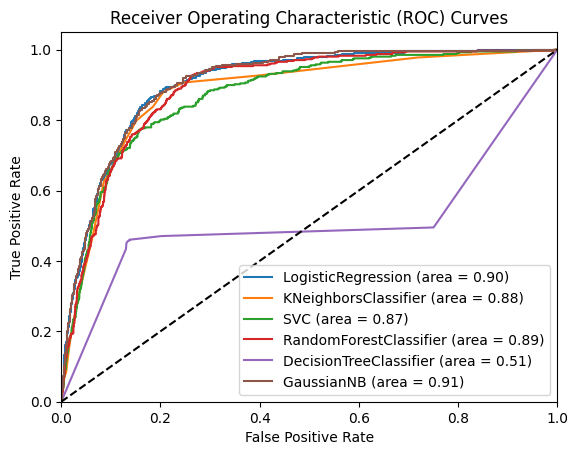

In [68]:
# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Predict and evaluate on test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calculate AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_test[:, 1] >= 0.5)  # Calculate accuracy

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}\n")
    model_filename = f"{name}_model_V3.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Store AUC-ROC
        'accuracy': accuracy_test
    }

    # Calculate ROC curve and AUC for each model
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    # Print model and F1 score info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test AUC-ROC: {info['auc_roc']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Qualifying Lap Data

Qualifying results help to determine the starting grid for the racers

In [69]:
df_with_qualifying = df_final_encoded

from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
val_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2016)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2017) & (df_with_qualifying["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finishes'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finishes'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finishes'].values

Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 1, 'random_state': 42}
Test AUC-ROC for LogisticRegression: 0.9220

Model: KNeighborsClassifier
Best parameters for KNeighborsClassifier: {'n_neighbors': 20}
Test AUC-ROC for KNeighborsClassifier: 0.8881

Model: SVC
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test AUC-ROC for SVC: 0.9048

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 10, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.9171

Model: DecisionTreeClassifier
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'random_state': 42}
Test AUC-ROC for DecisionTreeClassifier: 0.7277

Model: GaussianNB
Best parameters for GaussianNB: {'var_smoothing': 0.001}
Test AUC-ROC for GaussianNB: 0.9116

Model: LogisticRegression, File: LogisticRegression_model_V4.joblib, Test AUC-ROC: 0.9220, Test Accuracy: 0.8787
Model:

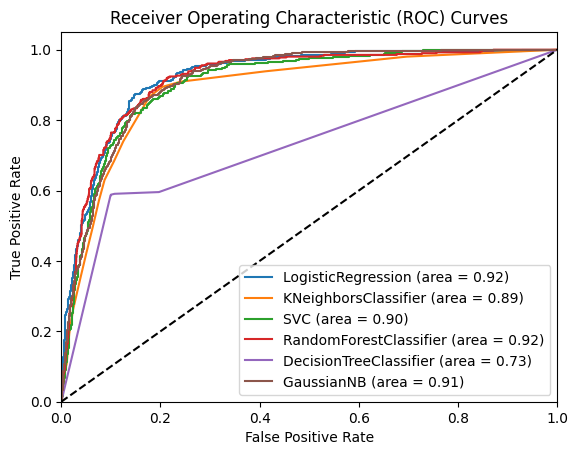

In [70]:
# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Predict and evaluate on test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calculate AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_test[:, 1] >= 0.5)  # Calculate accuracy

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}\n")
    model_filename = f"{name}_model_V4.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Store AUC-ROC
        'accuracy': accuracy_test
    }

    # Calculate ROC curve and AUC for each model
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    # Print model and F1 score info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test AUC-ROC: {info['auc_roc']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


### Model Interpretation

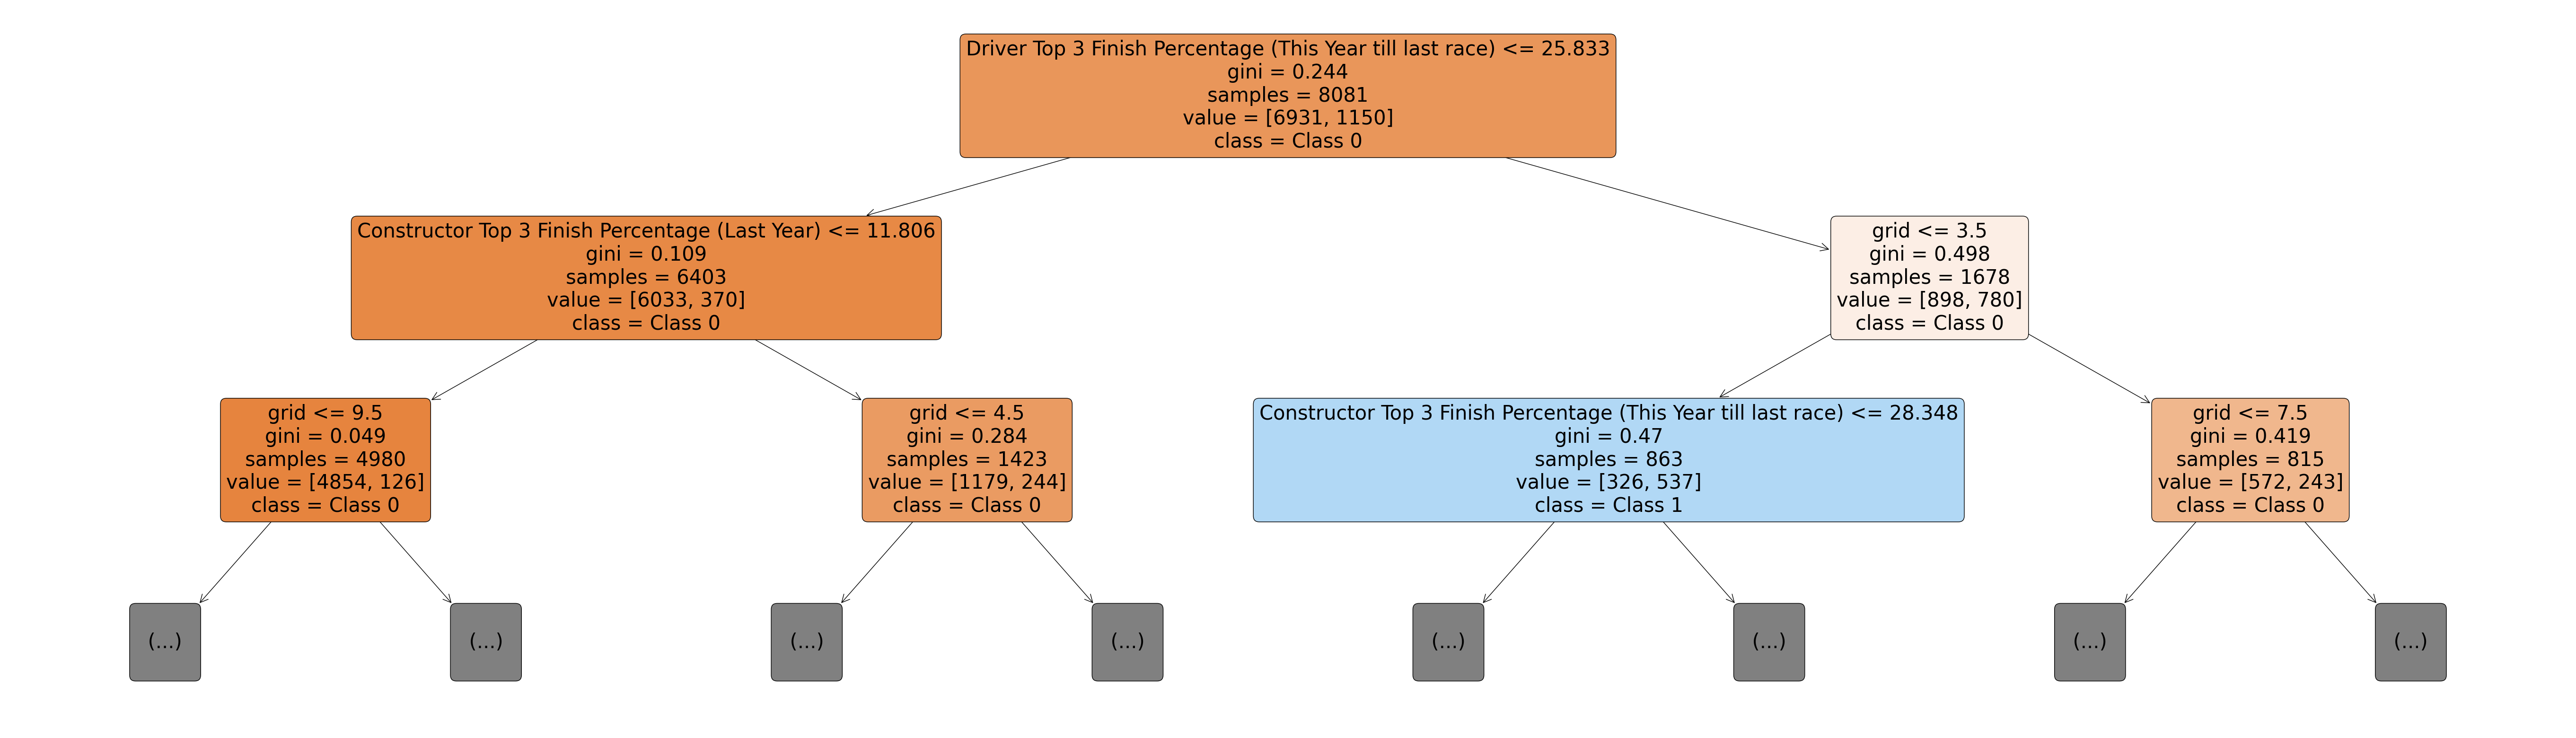

                                              Feature  Importance
5   Driver Top 3 Finish Percentage (This Year till...    0.275199
2                                                grid    0.115205
9   Driver Average Position (This Year till last r...    0.078745
10  Constructor Average Position (This Year till l...    0.074933
6   Constructor Top 3 Finish Percentage (This Year...    0.051833
1                                               round    0.050091
4     Constructor Top 3 Finish Percentage (Last Year)    0.048402
7                     Driver Avg position (Last Year)    0.031812
0                                                year    0.022868
3          Driver Top 3 Finish Percentage (Last Year)    0.022521


In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the maximum depth to display
max_depth = 2 # Adjust this value to control the number of levels shown

dt_model = joblib.load("DecisionTreeClassifier_model_V4.joblib")

# Set the size of the plot
plt.figure(figsize=(70, 20))

# Plot the tree with maximum depth
plot_tree(dt_model,
          max_depth=max_depth,
          filled=True,
          rounded=True,
          class_names=['Class 0', 'Class 1'],
          feature_names=train_df.columns,
          fontsize = 30)

# Show the plot
plt.show()

dt_feature_importances = dt_model.feature_importances_

# Create a DataFrame from the feature names and their importances
dt_importances_df = pd.DataFrame({
    'Feature': train_df.columns[:-1],  # Ensure this matches your feature set
    'Importance': dt_feature_importances
})

# Sort the DataFrame by the importances
dt_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the sorted DataFrame
print(dt_importances_df.head(10))


### Random Forest Classifier

In [72]:
# Random Forest Classifier
from joblib import load
model = load("RandomForestClassifier_model_V4.joblib")
importances = model.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': df_with_qualifying.columns[:-1], 'Importance': importances})

# Sort the DataFrame
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
print(importances_df.head(10))

print(model.get_params(deep = True))

                                              Feature  Importance
2                                                grid    0.099216
5   Driver Top 3 Finish Percentage (This Year till...    0.093936
9   Driver Average Position (This Year till last r...    0.087175
6   Constructor Top 3 Finish Percentage (This Year...    0.086367
10  Constructor Average Position (This Year till l...    0.079897
4     Constructor Top 3 Finish Percentage (Last Year)    0.064014
3          Driver Top 3 Finish Percentage (Last Year)    0.054828
1                                               round    0.051257
7                     Driver Avg position (Last Year)    0.048759
8                Constructor Avg position (Last Year)    0.039403
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.

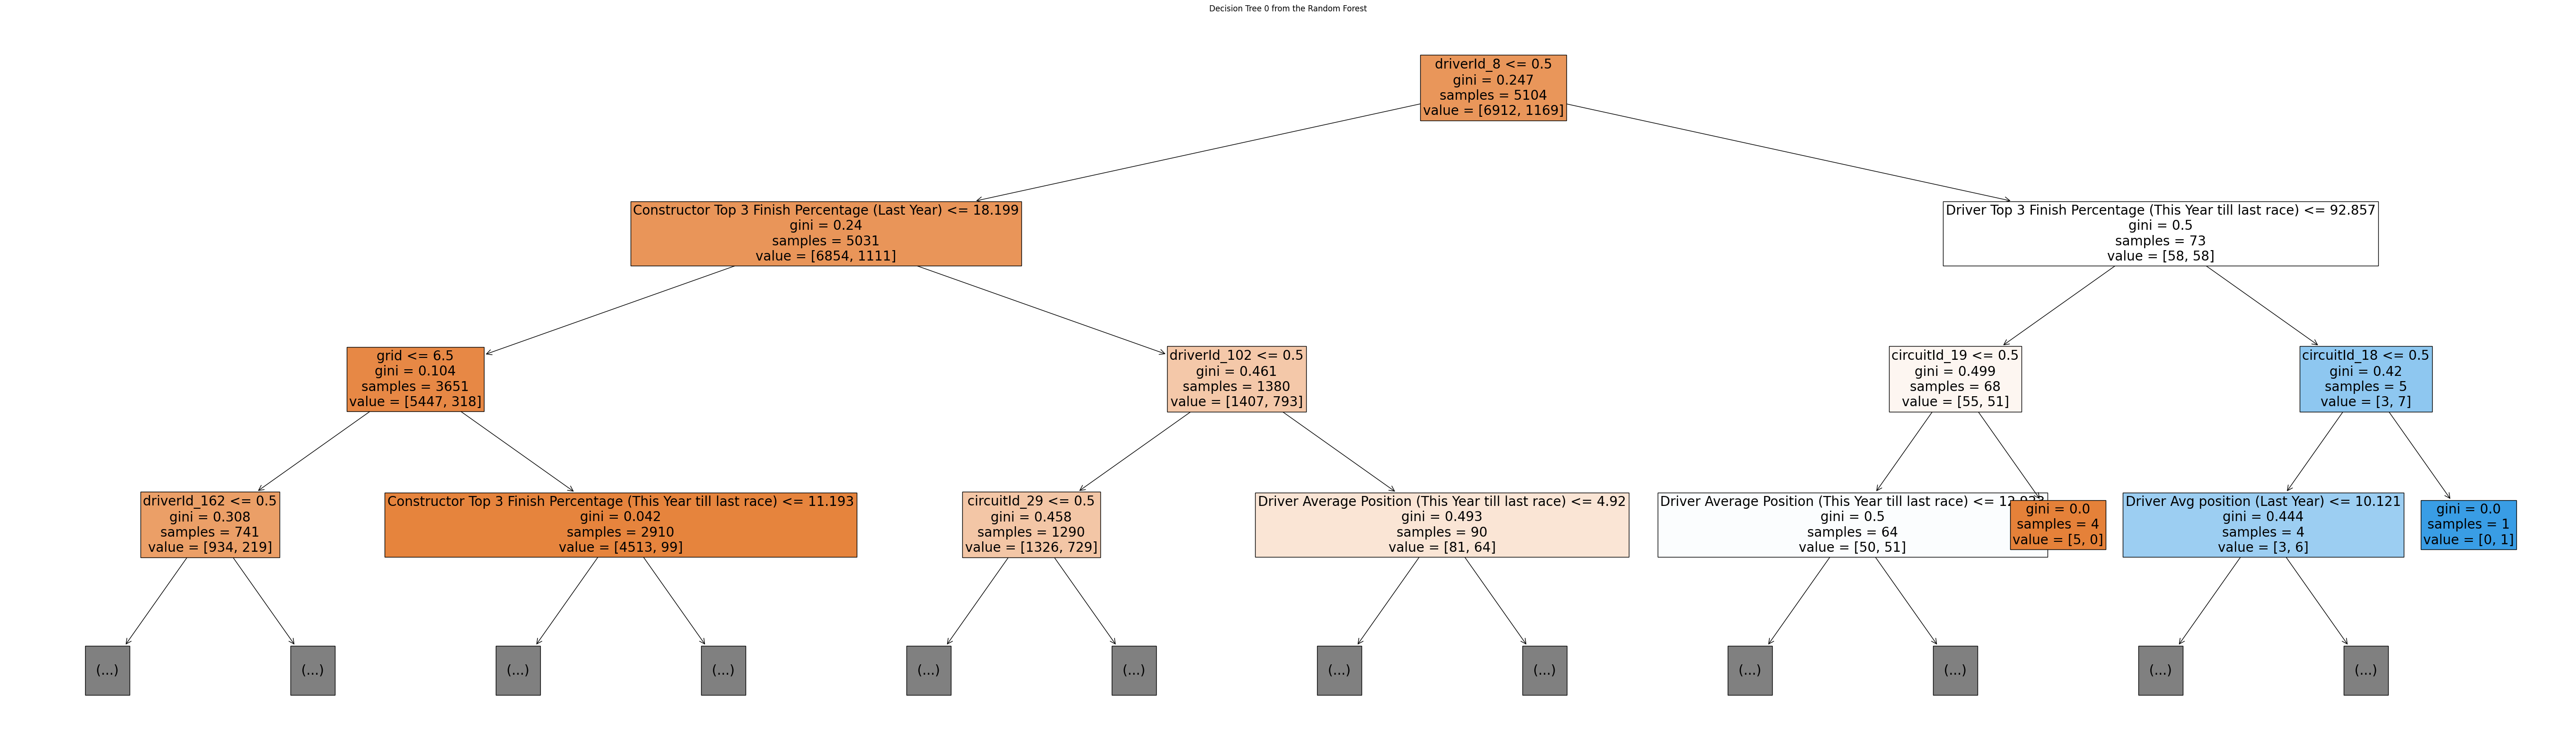

In [73]:
from sklearn import tree
single_tree = model.estimators_[0]

# Visualization
plt.figure(figsize=(70,20))  # Adjust the size as needed
tree.plot_tree(single_tree, filled=True, feature_names=df_with_qualifying.columns[:-1], max_depth=3, fontsize = 20)
plt.title("Decision Tree 0 from the Random Forest")
plt.show()

### Changing thresholds for models and Model Prediction
We want to fine tune our best model Random Forest Classifier ('max depth' = 10 and 'number of estimators' = 50) by adjusting decision thresholds to balance the tradeoff between true positive and false positive rates. Since both recall and precision are important evaluation metrics for our use case, we optimized the F1 score (harmonic mean of Recall and Precision) to determine the best threshold.

Optimal Threshold for F1 Score: 0.381


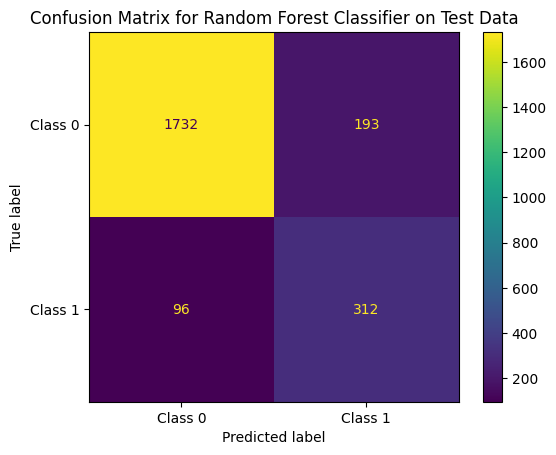

Accuracy of the model: 0.876
F1 Score of the model: 0.683


['RandomForestClassifier_model_V4_with_threshold.joblib']

In [74]:
from sklearn.metrics import precision_recall_curve, f1_score
# Load the model
model = load("RandomForestClassifier_model_V4.joblib")

# Predict probabilities on new data
data_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Find the optimal threshold
optimal_idx = np.nanargmax(f1_scores)  # Using nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for F1 Score: {optimal_threshold:.3f}")

# Apply the new threshold to make class predictions
pred_test = (data_prob >= optimal_threshold).astype(int)

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy of the model: {accuracy:.3f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score of the model: {f1:.3f}")

# Create a dictionary to hold the model and the threshold
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Save the dictionary
model_filename = "RandomForestClassifier_model_V4_with_threshold.joblib"
joblib.dump(model_data, model_filename)

### Second Best - Logistic Regression Model (C=10)

Optimal Threshold for F1 Score: 0.276


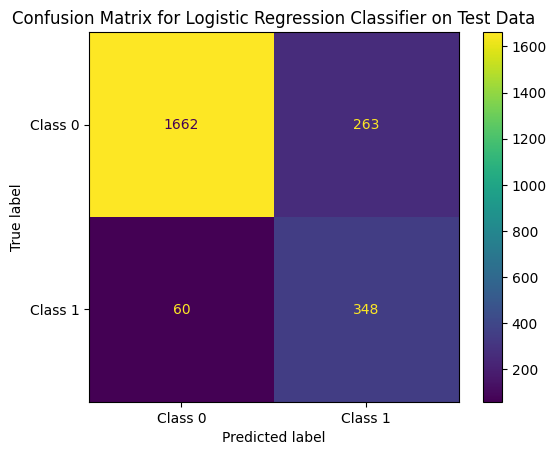

Accuracy of the model: 0.862
F1 Score of the model: 0.683


['LogisticRegression_model_V4_with_threshold.joblib']

In [75]:
model = load("LogisticRegression_model_V4.joblib")

# Predict probabilities on new data
data_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Find the optimal threshold
optimal_idx = np.nanargmax(f1_scores)  # Using nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for F1 Score: {optimal_threshold:.3f}")

# Apply the new threshold to make class predictions
pred_test = (data_prob >= optimal_threshold).astype(int)

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Logistic Regression Classifier on Test Data")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy of the model: {accuracy:.3f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score of the model: {f1:.3f}")

# Create a dictionary to hold the model and the threshold
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Save the dictionary
model_filename = "LogisticRegression_model_V4_with_threshold.joblib"
joblib.dump(model_data, model_filename)

# F1 Podium prediction test - 2023 Spanish Grand Prix (Round 7) 

In [77]:
from joblib import load
import pandas as pd

round = 7

# Load the model and threshold
model_data = load("RandomForestClassifier_model_V4_with_threshold.joblib")
model = model_data["model"]
optimal_threshold = model_data["threshold"]

# Filter the DataFrame for the year 2023 and round 7 (Spanish Grand Prix)
df_2023 = df_with_qualifying[(df_with_qualifying["year"] == 2023) & (df_with_qualifying["round"] == round)]

# Prepare the feature matrix for prediction
X_2023 = df_2023[df_2023.columns.tolist()[:-1]].values

# Compute probabilities using the model
probabilities = model.predict_proba(X_2023)

# Apply the threshold to make class predictions
pred_test = (probabilities[:, 1] >= optimal_threshold).astype(int)  # Assuming the second column represents the probability of top 3 finish

# Selecting relevant columns and filtering for year 2023 and round 7
df_predict2023 = df_final[["year", "round", "driverId", "constructorId", "grid", "Top 3 Finishes"]]
df_predict2023 = df_predict2023[(df_predict2023["year"] == 2023) & (df_predict2023["round"] == round)]



# Create a dictionary to map 'driverId' to 'surname'
driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

# Replace 'driverId' with corresponding 'surname' in df_predict2023
df_predict2023['driverId'] = df_predict2023['driverId'].map(driver_name_dict)

# Append the predictions to the DataFrame
df_predict2023['Top_3_Finish_Prediction'] = pred_test


# Create a dictionary to map 'constructorId' to 'name'
constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

# Replace 'constructorId' with corresponding 'name' in df_predict2023
df_predict2023['constructorId'] = df_predict2023['constructorId'].map(constructor_name_dict)

# Append the predictions to the DataFrame
df_predict2023['Top_3_Finish_Prediction'] = pred_test


# Print the DataFrame with predictions
print(df_predict2023)


       year  round    driverId   constructorId  grid  Top 3 Finishes  \
17201  2023      7  Verstappen        Red Bull     1               1   
17202  2023      7    Hamilton        Mercedes     4               1   
17203  2023      7     Russell        Mercedes    12               1   
17204  2023      7       Pérez        Red Bull    11               0   
17205  2023      7       Sainz         Ferrari     2               0   
17206  2023      7      Stroll    Aston Martin     5               0   
17207  2023      7      Alonso    Aston Martin     8               0   
17208  2023      7        Ocon  Alpine F1 Team     6               0   
17209  2023      7        Zhou      Alfa Romeo    13               0   
17210  2023      7       Gasly  Alpine F1 Team    10               0   
17211  2023      7     Leclerc         Ferrari    19               0   
17212  2023      7     Tsunoda      AlphaTauri    15               0   
17214  2023      7    de Vries      AlphaTauri    14            

In [78]:
model = load("LogisticRegression_model_V4.joblib")

df_2023 = df_with_qualifying[(df_with_qualifying["year"] == 2023) & (df_with_qualifying["round"] == 5)]
X_2023 = df_2023[df_2023.columns.tolist()[:-1]].values
print(df_2023)
probabilities = model.predict_proba(X_2023)
print(probabilities)

       year  round  grid  Driver Top 3 Finish Percentage (Last Year)  \
17161  2023      5     9                                   77.272727   
17162  2023      5     1                                   50.000000   
17163  2023      5     2                                    0.000000   
17164  2023      5     6                                   36.363636   
17165  2023      5     3                                   40.909091   
17166  2023      5    13                                   40.909091   
17167  2023      5     7                                   50.000000   
17168  2023      5     5                                    0.000000   
17169  2023      5     8                                    0.000000   
17170  2023      5     4                                    0.000000   
17171  2023      5    17                                    0.000000   
17172  2023      5    18                                    0.000000   
17173  2023      5    10                                    0.00

### Predicting F1 Podiums with qualifying data - Oversampling 

Oversample minority class

In [80]:
df_with_qualifying = df_final_encoded

In [82]:
from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
val_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2016)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2017) & (df_with_qualifying["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finishes'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finishes'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finishes'].values

print(X_train)
print(y_train)

[[1983 2 22 ... False False False]
 [1983 2 23 ... False False False]
 [1983 2 2 ... False False False]
 ...
 [2008 18 16 ... False False False]
 [2008 18 19 ... False False False]
 [2008 18 14 ... False False False]]
[1 1 1 ... 0 0 0]


In [83]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Summarize class distribution
print("Before oversampling: ", Counter(y_train))
print("After oversampling: ", Counter(y_train_resampled))

Before oversampling:  Counter({0: 6931, 1: 1150})
After oversampling:  Counter({1: 6931, 0: 6931})


Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 0.1, 'random_state': 42}
Test AUC-ROC for LogisticRegression: 0.9219

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 10, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.9151

Model: LogisticRegression, File: LogisticRegression_model_V5.joblib, Test AUC-ROC: 0.9219, Test Accuracy: 0.7968
Model: RandomForestClassifier, File: RandomForestClassifier_model_V5.joblib, Test AUC-ROC: 0.9151, Test Accuracy: 0.8723


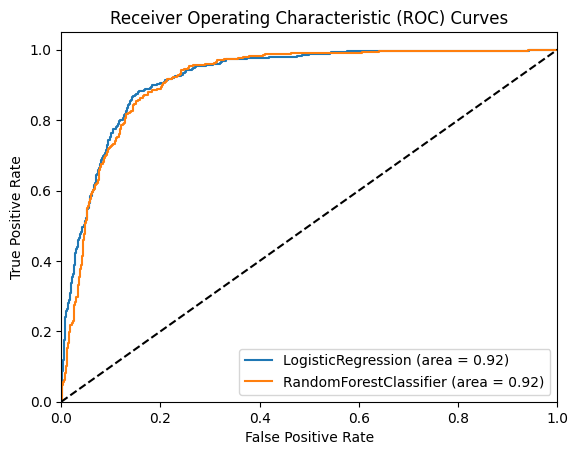

In [84]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, ConfusionMatrixDisplay  # Import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Dictionary to store the best model and test accuracy for each algorithm
model_accuracy_info = {}

# Define the hyperparameter grid for each model
param_grid = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'random_state': [42]}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Ignore convergence and future warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Function to manually tune hyperparameters
def tune_hyperparameters(model, params, X_train_resampled, y_train_resampled, X_val, y_val):
    best_model = None
    best_params = {}
    best_auc = 0  # Use AUC-ROC instead of F1 score
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train_resampled, y_train_resampled)
        probabilities = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, probabilities[:, 1])  # Calculate AUC-ROC
        if auc > best_auc:
            best_auc = auc
            best_model = model
            best_params = param
    return best_model, best_params

# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train_resampled, y_train_resampled, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Predict and evaluate on test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calculate AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_test[:, 1] >= 0.5)  # Calculate accuracy

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}\n")
    model_filename = f"{name}_model_V5.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Store AUC-ROC
        'accuracy': accuracy_test
    }

    # Calculate ROC curve and AUC for each model
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    # Print model and F1 score info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test AUC-ROC: {info['auc_roc']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


The ROC-AUC scores are lower than before therefore we stick to with the previous model we used.

### Predicting using only top 20 drivers 

For our second model, we want to predict each driver's exact finishing position in each race. Since the number of drivers are not the same in each year, we only consider the drivers in the top 20 for every race in our training and test sets. For each of these 20 drivers in every race, we want to classify his finishing position into 1 of 20 categories (1st, 2nd, ..., 20th). To determine the best possible model, we use cross entropy loss as a metric to evaluate how well the model's predicted probabilities align with the actual labels, guiding us in optimizing the model parameters for better accuracy and performance.

The features we used to train this model are the same as the ones we used to predict top 3 finishers. We selected a variety of models for this multiclass classification problem, including Logistic Regression, Random Forest, K-Nearest Neighbors, and Decision Tree.

In [86]:
print(df_final_keepPositionOrder)
df_position = df_final_encoded
df_position.drop(["Top 3 Finishes"], axis = 1, inplace=True)
# Check if both DataFrames have the same number of rows
if len(df_position) == len(df_final_keepPositionOrder):
    # Add 'positionOrder' column from df_final_keepPositionOrder to df_final
    df_position['positionOrder'] = df_final_keepPositionOrder['positionOrder']
else:
    print("The number of rows in df_final and df_final_keepPositionOrder does not match.")
print(df_position)

       year  round  circuitId  driverId  constructorId  grid  positionOrder  \
493    1983      2         43       187              1    22              1   
494    1983      2         43       182              1    23              2   
495    1983      2         43       163              6     2              3   
496    1983      2         43       172              3     4              4   
497    1983      2         43       176             21    16              5   
...     ...    ...        ...       ...            ...   ...            ...   
17993  2024     24         24       840            117    13             14   
17995  2024     24         24       825            210    14             16   
17996  2024     24         24       859            215    12             17   
17997  2024     24         24       822             15     9             18   
17999  2024     24         24       815              9    10             20   

       Top 3 Finishes  Driver Top 3 Finish Percenta

In [87]:
df_top20 = df_position[df_position['positionOrder'] <= 20]

# Now split df_top20 into training, validation, and test sets as per your original year-based method
train_df = df_top20[(df_top20["year"] >= 1983) & (df_top20["year"] <= 2008)]
val_df = df_top20[(df_top20["year"] >= 2009) & (df_top20["year"] <= 2016)]
test_df = df_top20[(df_top20["year"] >= 2017) & (df_top20["year"] <= 2023)]

# Extract features and target variables
X_train = train_df.drop('positionOrder', axis=1)
y_train = train_df['positionOrder']
X_val = val_df.drop('positionOrder', axis=1)
y_val = val_df['positionOrder']
X_test = test_df.drop('positionOrder', axis=1)
y_test = test_df['positionOrder']


Model: LogisticRegression

Best parameters for LogisticRegression: {'C': 0.01, 'multi_class': 'multinomial', 'random_state': 42}
Test Log Loss for LogisticRegression: 2.7162
Test Accuracy for LogisticRegression: 0.1316


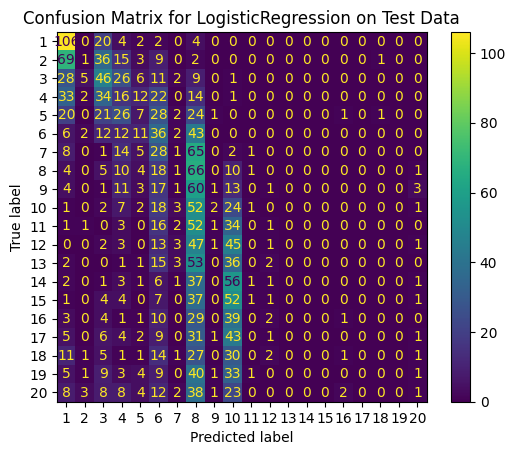





Model: RandomForestClassifier

Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50, 'random_state': 42}
Test Log Loss for RandomForestClassifier: 2.7757
Test Accuracy for RandomForestClassifier: 0.1260


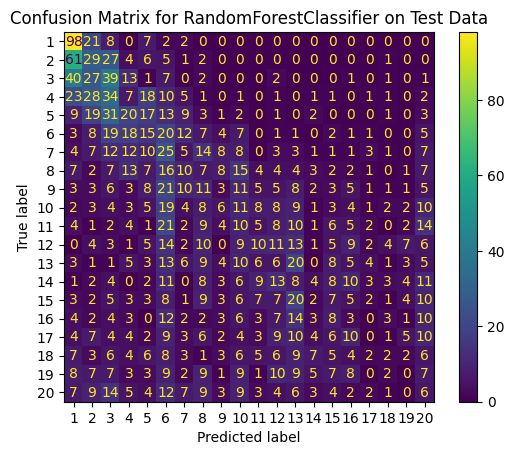





Model: KNeighborsClassifier

Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 10}
Test Log Loss for KNeighborsClassifier: 17.2864
Test Accuracy for KNeighborsClassifier: 0.1149


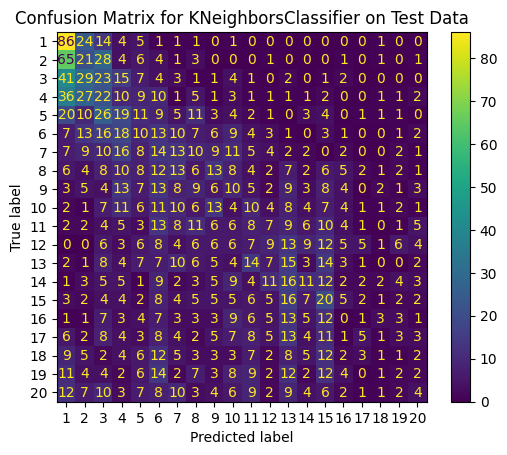





Model: DecisionTreeClassifier

Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'random_state': 42}
Test Log Loss for DecisionTreeClassifier: 24.5974
Test Accuracy for DecisionTreeClassifier: 0.1046


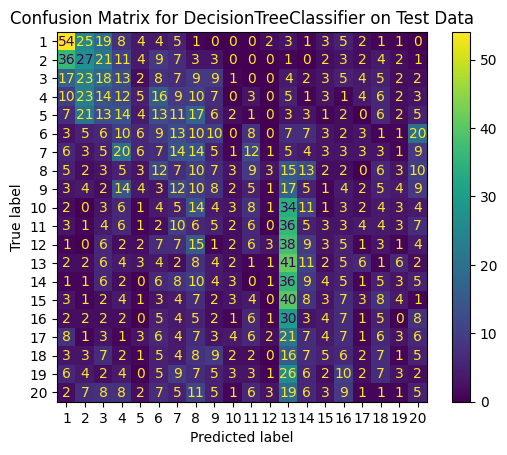





Model: LogisticRegression, File: LogisticRegression_model_multiClass.joblib, Test Log Loss: 2.7162, Test Accuracy: 0.1316
Model: RandomForestClassifier, File: RandomForestClassifier_model_multiClass.joblib, Test Log Loss: 2.7757, Test Accuracy: 0.1260
Model: KNeighborsClassifier, File: KNeighborsClassifier_model_multiClass.joblib, Test Log Loss: 17.2864, Test Accuracy: 0.1149
Model: DecisionTreeClassifier, File: DecisionTreeClassifier_model_multiClass.joblib, Test Log Loss: 24.5974, Test Accuracy: 0.1046


In [88]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import log_loss

# Dictionary to store the best model and test accuracy for each algorithm
model_accuracy_info = {}

param_grid = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42], 'multi_class': ['multinomial']},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'random_state': [42]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 15, 20], 'random_state': [42]}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Function to manually tune hyperparameters
def tune_hyperparameters(model, params, X_train, y_train, X_val, y_val):
    best_model = None
    best_params = {}
    best_log_loss = float('inf')
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train, y_train)
        probabilities = model.predict_proba(X_val)
        log_loss_val = log_loss(y_val, probabilities)
        if log_loss_val < best_log_loss:
            best_log_loss = log_loss_val
            best_model = model
            best_params = param
    return best_model, best_params

# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}\n")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model
    else:
        # Fit model with default parameters
        model.fit(X_train, y_train)

    # Predict and evaluate on test data
    pred_test = model.predict(X_test)
    probabilities_test = model.predict_proba(X_test)
    log_loss_test = log_loss(y_test, probabilities_test)
    accuracy_test = accuracy_score(y_test, pred_test)
    print(f"Test Log Loss for {name}: {log_loss_test:.4f}")
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")

    model_filename = f"{name}_model_multiClass.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'log_loss': log_loss_test,
        'accuracy': accuracy_test
    }

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
    plt.title(f"Confusion Matrix for {name} on Test Data")
    plt.show()
    print("\n\n\n")

# Print model and accuracy info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test Log Loss: {info['log_loss']:.4f}, Test Accuracy: {info['accuracy']:.4f}")
